# Importing the data and applying the EDA, Data Cleaning, Data Coorelation, Lable Encoding, Feature Scalling

In [513]:
import pandas as pd
import numpy as np

In [514]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [516]:
# Starting with data cleaning part....
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [517]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

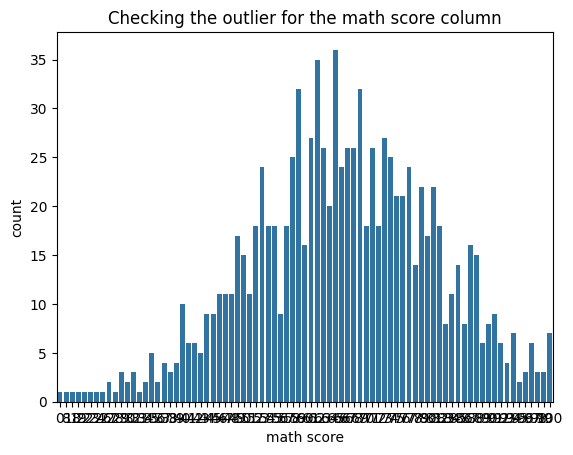

In [518]:
# As there is no null values we have to check for the outliers
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting the countplot for the numeric columns
sns.countplot(x = 'math score', data = df)
plt.title("Checking the outlier for the math score column")
plt.show()

In [519]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [520]:
df['math score'].value_counts()

math score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64

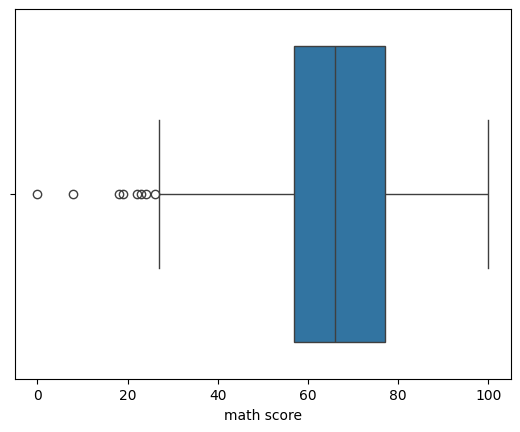

In [521]:
sns.boxplot(x = 'math score',data = df)
plt.show()

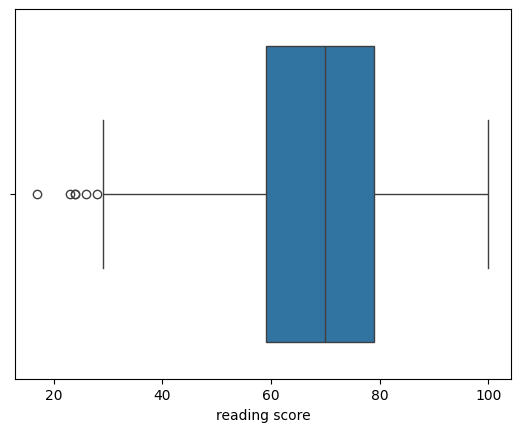

In [522]:
sns.boxplot(x = 'reading score',data = df)
plt.show()

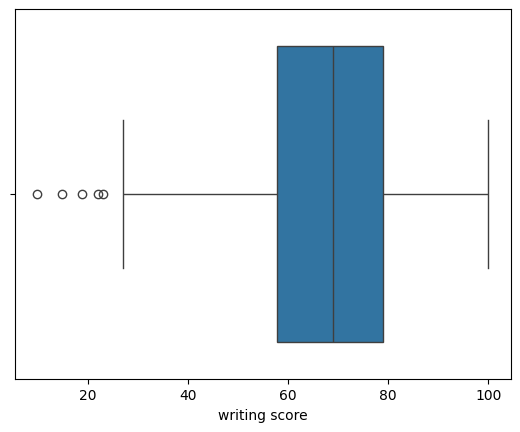

In [523]:
sns.boxplot(x = 'writing score',data = df)
plt.show()

In [524]:
df.shape

(1000, 8)

In [525]:
df.ndim

2

In [526]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

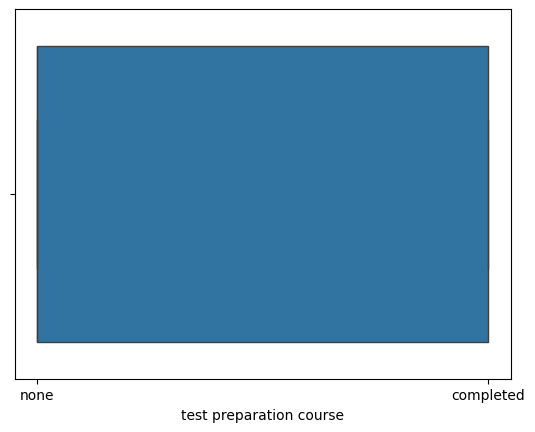

In [527]:
sns.boxplot(x = 'test preparation course',data = df)
plt.show()

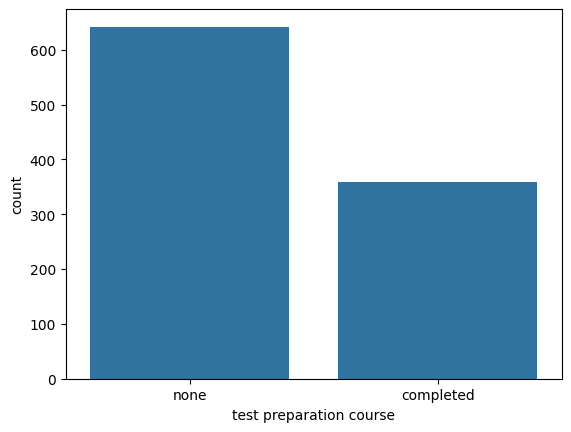

In [528]:
sns.countplot(x = 'test preparation course',data = df); plt.show()

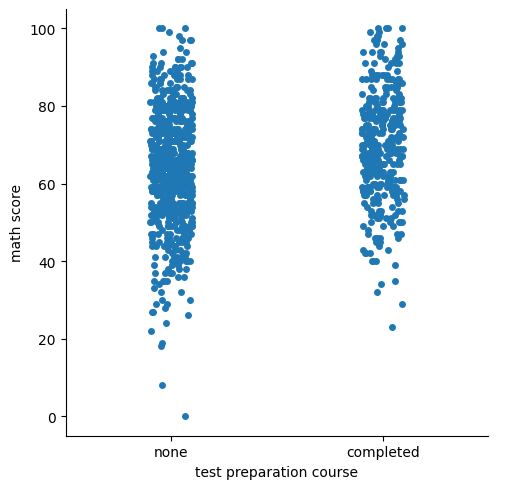

In [529]:
sns.catplot(x = 'test preparation course', y = 'math score', data = df)
plt.show()

In [530]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

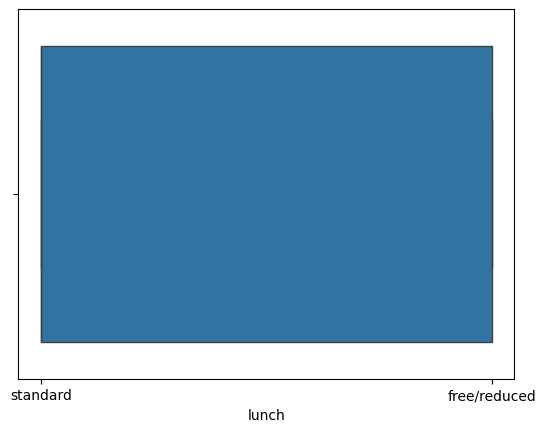

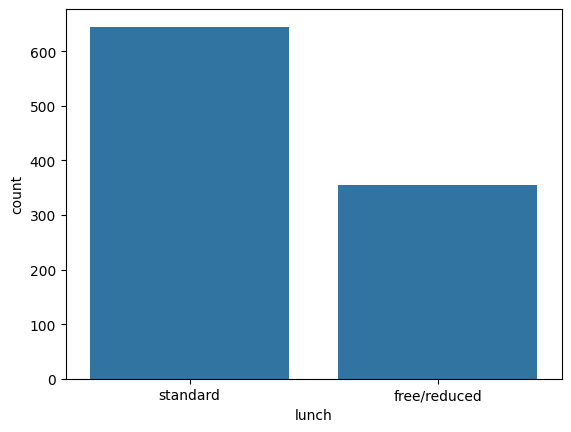

In [531]:
sns.boxplot(x = 'lunch',data = df)
plt.show()
sns.countplot(x = 'lunch', data = df)
plt.show()

In [532]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [533]:
# Removing the outliers from the following list
outliers_list = ['math score', 'reading score','writing score']
Q1 = df[outliers_list].quantile(0.25)
Q3 = df[outliers_list].quantile(0.75)
# Finding the IQR....
IQR = Q3 - Q1
print(f'The Inter Quatile Range: {IQR}')
# finding the lowerbound and the upperbound of this dataset
lowerbound = Q1 - 1.5 * IQR
upperbound = Q3 + 1.5 * IQR
# Printing the two values
print(f'Range: {lowerbound} -- {upperbound}')
outliers = df[((df[outliers_list] < lowerbound) | (df[outliers_list] > upperbound)).any(axis=1)]

The Inter Quatile Range: math score       20.00
reading score    20.00
writing score    21.25
dtype: float64
Range: math score       27.000
reading score    29.000
writing score    25.875
dtype: float64 -- math score       107.000
reading score    109.000
writing score    110.875
dtype: float64


In [534]:
outliers

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
76,male,group E,some high school,standard,none,30,26,22
145,female,group C,some college,free/reduced,none,22,39,33
211,male,group C,some college,free/reduced,none,35,28,27
327,male,group A,some college,free/reduced,none,28,23,19
338,female,group B,some high school,free/reduced,none,24,38,27
466,female,group D,associate's degree,free/reduced,none,26,31,38
596,male,group B,high school,free/reduced,none,30,24,15
787,female,group B,some college,standard,none,19,38,32


In [535]:
df.shape

(1000, 8)

In [536]:
outliers.index

Index([17, 59, 76, 145, 211, 327, 338, 466, 596, 787, 842, 980], dtype='int64')

In [537]:
df.drop(outliers.index, inplace= True)

In [538]:
df.shape

(988, 8)

In [539]:
df.describe()

,math score,reading score,writing score
count,988.000000,988.000000,988.000000
mean,66.625506,69.640688,68.566802
std,14.409394,14.016760,14.525267
min,27.000000,29.000000,27.000000
25%,57.000000,60.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


In [540]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [541]:
df[df.duplicated()] # No duplicate values are here in the dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [542]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [543]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       988 non-null    object
 1   race/ethnicity               988 non-null    object
 2   parental level of education  988 non-null    object
 3   lunch                        988 non-null    object
 4   test preparation course      988 non-null    object
 5   math score                   988 non-null    int64 
 6   reading score                988 non-null    int64 
 7   writing score                988 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 69.5+ KB


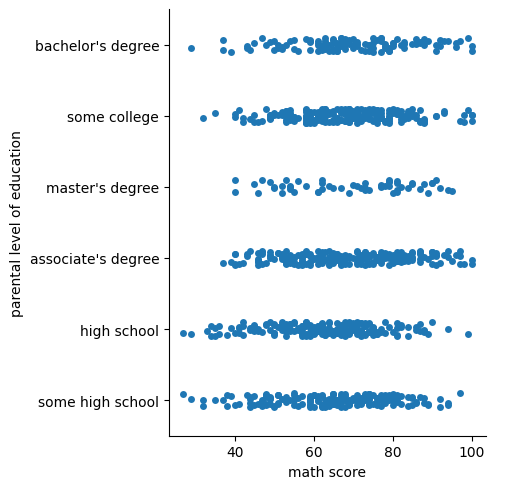

In [544]:
sns.catplot(y = 'parental level of education', x = 'math score', data = df)
plt.show()

In [545]:
# Its showing that in this dataset the parental level of education column is not that much needed or effecting for the 
# Prediction pourpose so removing the colum from the data set
del df['parental level of education']

In [546]:
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,female,group B,standard,none,72,72,74
1,female,group C,standard,completed,69,90,88
2,female,group B,standard,none,90,95,93
3,male,group A,free/reduced,none,47,57,44
4,male,group C,standard,none,76,78,75


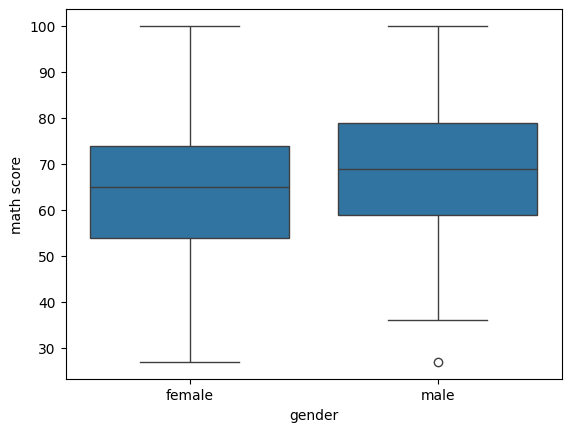

In [547]:
sns.boxplot(x = 'gender', y = 'math score', data = df)
plt.show()

In [548]:
df['race/ethnicity'].value_counts()

race/ethnicity
group C    316
group D    261
group B    184
group E    139
group A     88
Name: count, dtype: int64

In [549]:
df['lunch'].value_counts()

lunch
standard        643
free/reduced    345
Name: count, dtype: int64

In [550]:
df['test preparation course'].value_counts()

test preparation course
none         631
completed    357
Name: count, dtype: int64

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   988 non-null    object
 1   race/ethnicity           988 non-null    object
 2   lunch                    988 non-null    object
 3   test preparation course  988 non-null    object
 4   math score               988 non-null    int64 
 5   reading score            988 non-null    int64 
 6   writing score            988 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 61.8+ KB


In [552]:
# sns.catplot(y = 'math score', x = 'race/ethnicity'); plt.show()

In [553]:
# Treating the categorical data (Lable Encoding) for all the categorical datasets
cat_cols = ['gender','lunch','test preparation course']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,0,group B,1,1,72,72,74
1,0,group C,1,0,69,90,88
2,0,group B,1,1,90,95,93
3,1,group A,0,1,47,57,44
4,1,group C,1,1,76,78,75


In [554]:
# """from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for i in cat:
#     df[i] = le.fit_transform(df[i])
# df.head()  
# """

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   gender                   988 non-null    int64 
 1   race/ethnicity           988 non-null    object
 2   lunch                    988 non-null    int64 
 3   test preparation course  988 non-null    int64 
 4   math score               988 non-null    int64 
 5   reading score            988 non-null    int64 
 6   writing score            988 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 61.8+ KB


In [555]:
# Heading towards feature scalling.....
num_list = [['math score','reading score','writing score']]
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
for i in num_list:
    df[i] = mm.fit_transform(df[i])

In [556]:
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score
0,0,group B,1,1,0.616438,0.605634,0.643836
1,0,group C,1,0,0.575342,0.859155,0.835616
2,0,group B,1,1,0.863014,0.929577,0.904110
3,1,group A,0,1,0.273973,0.394366,0.232877
4,1,group C,1,1,0.671233,0.690141,0.657534


In [557]:
# finding the correlation
df.corr(numeric_only=True)

,gender,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,0.016624,-0.005402,0.162709,-0.264741,-0.326716
lunch,0.016624,1.000000,0.023597,0.336532,0.208236,0.225005
test preparation course,-0.005402,0.023597,1.000000,-0.167169,-0.232847,-0.308779
math score,0.162709,0.336532,-0.167169,1.000000,0.801405,0.783349
reading score,-0.264741,0.208236,-0.232847,0.801405,1.000000,0.950629
writing score,-0.326716,0.225005,-0.308779,0.783349,0.950629,1.000000


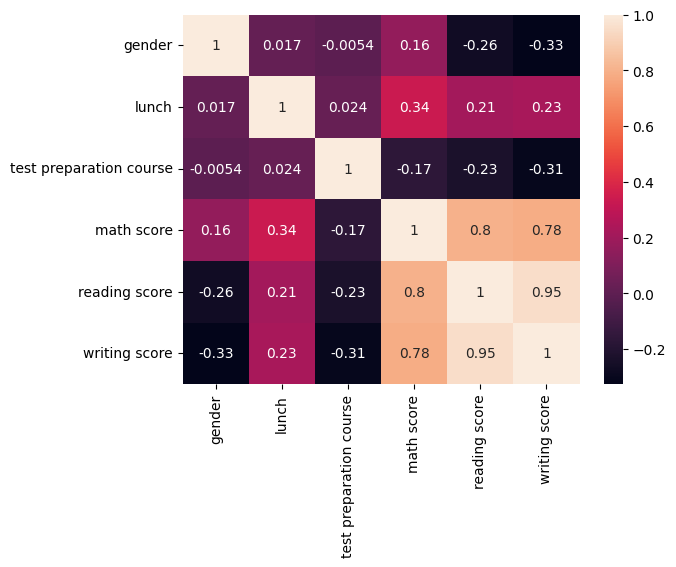

In [558]:
# Plotting the heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [559]:
# For predicting the maths score the reading and writting score are on a high (+ve) coorelation
# So we can consider it with predicting from the maths score

In [560]:
# Feature selection
x = df[['reading score','writing score','test preparation course','lunch','gender']]
y = df['math score']
from sklearn.feature_selection import SelectKBest, f_regression
kbest = SelectKBest(f_regression, k = 2)
kbest.fit_transform(x,y)
kbest.get_support(indices=True)

array([0, 1])

In [ ]:
# Going for model selection (train/test split)
x = df[['reading score', 'writing score']]
y = df['math score']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,shuffle=True,random_state=1)

In [562]:
# Simple linear Regression (Model Building)
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [563]:
slr.coef_

array([0.53791484, 0.27235323])

In [564]:
slr.intercept_

np.float64(0.07683511662486997)

In [565]:
y_pred = slr.predict(x_test)

In [566]:
y_pred

array([0.49892985, 0.69488195, 0.86087259, 0.31778668, 0.63088456,
       0.34063001, 0.41220366, 0.51035151, 0.56688717, 0.52131504,
       0.54065657, 0.81937493, 0.61211569, 0.48750818, 0.61923383,
       0.07683512, 0.75503394, 0.25028749, 0.68007302, 0.72099801,
       0.36312974, 0.69872735, 0.30320681, 0.5666581 , 0.7587648 ,
       0.37432233, 0.34063001, 0.42385439, 0.63495902, 0.57411983,
       0.36312974, 0.56304177, 0.42735619, 0.31847388, 0.5446165 ,
       0.28386528, 0.73264874, 0.72122708, 0.70607455, 0.73253421,
       0.80795326, 0.3972802 , 0.43831972, 0.71365081, 0.41243273,
       0.30309228, 0.66480595, 0.37082053, 0.67972942, 0.48027552,
       0.6082703 , 0.56304177, 0.39716566, 0.61561749, 0.84922186,
       0.86844885, 0.69488195, 0.26521095, 0.45347226, 0.50243165,
       0.42712713, 0.73253421, 0.29540148, 0.76272474, 0.78137907,
       0.24621302, 0.58531243, 0.61211569, 0.60069403, 0.49915891,
       0.60035043, 0.57796523, 0.50627705, 0.5516201 , 0.52877

In [567]:
len(y_pred)

247

In [568]:
# Model Extraction
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6658828492571282

In [569]:
# User Input
reading_score = int(input("Enter reading score: "))
writing_score = int(input("Enter writing score: "))
ypredd = slr.predict(np.array([reading_score,writing_score]).reshape(1, -1))
ypredd

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.53651423])

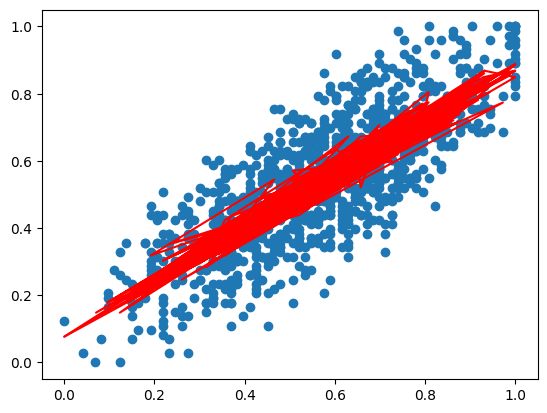

In [570]:
plt.scatter(df['writing score'], df['math score'])
plt.plot(x_test, y_pred,color='red')
plt.show()

In [571]:
import pickle
pickle.dump(slr,open('math_prediction_model.pkl','wb'))